In [29]:
library(tidyverse)

In [30]:
Krause_stocks <- read.csv("../41467_2025_59204_MOESM4_ESM/Supplementary Software/stocks.csv" , fileEncoding="latin1") |>
                 dplyr::rename(Article.ID = `ï..Article.ID`)
Krause_stocks_cols <- dput(colnames(Krause_stocks))

c("Article.ID", "Publication.year", "Study.site", "Country", 
"Latitude", "Longitude", "Coastal.typology", "Marine.ecoregion", 
"Seagrass.bioregion", "Seagrass.functionalmorphological.group", 
"Seagrass.species", "Seagrass.genus", "Additional.identification", 
"Above.ground.biomass", "Below.ground.biomass", "Total.biomass", 
"Sampling.depth", "Ctot.stock", "Ctot.content", "Corg.stock", 
"Corg.content", "Cinorg.stock", "Cinorg.content", "Ctot.stock.15cm", 
"Corg.stock.15cm", "Cinorg.stock.15cm", "Ctot.stock.30cm", "Corg.stock.30cm", 
"Cinorg.stock.30cm", "Ctot.stock.50cm", "Corg.stock.50cm", "Cinorg.stock.50cm", 
"Ctot.stock.100cm", "Corg.stock.100cm", "Cinorg.stock.100cm", 
"OM.content", "Porosity", "Dry.Bulk.Density", "Grain.size", "Fraction.mud", 
"Notes")


In [31]:
Krause_data <- read.csv("../41467_2025_59204_MOESM4_ESM/Supplementary Software/Core_data.csv" , fileEncoding="latin1")
Krause_data_cols <- dput(colnames(Krause_data))

c("ï..Article.ID", "Primary.reference", "Secondary.reference", 
"Publication.year", "Site.name", "Country", "Latitude", "Longitude", 
"Species", "Core.ID", "Top.of.section", "Bottom.of.section", 
"Depth.at.center.of.slice", "Thickness.sediment.slice", "Dry.Bulk.Density", 
"OM.content", "OM.density", "Corg", "Cinorg", "Cinorg.stock.increment", 
"Corg.stock.increment", "Ctot.stock.increment", "DBD.core", "OM.content.core", 
"Corg.core", "Cinorg.core", "Cinorg.stock.core", "Corg.stock.core", 
"Ctot.stock.core", "Depth.of.core", "X", "X.1", "X.2")


In [32]:
Krause_database <- read_rds("../data/Krause_database.rds") |>
                   dplyr::mutate(data_source = "Krause_et_al_2025") |>
                   dplyr::relocate(data_source)
dim(Krause_database)

[1] 2813   48

In [33]:
Krause_database |> select(where(~ !all(is.na(.)))) |> dim()

[1] 2813   48

In [152]:
zaf_data_df <- read_rds("../data/zaf_data_df.rds") 
glimpse(zaf_data_df)

Rows: 573
Columns: 13
$ data_source             <chr> "Bossert_et_al_2024", "Bossert_et_al_2024", "B…
$ study_id                <chr> "Bossert_et_al_2024", "Bossert_et_al_2024", "B…
$ site_id                 <chr> "Berg", "Berg", "Berg", "Berg", "Berg", "Berg"…
$ core_id                 <chr> "LWR_SS1_R1", "LWR_SS1_R1", "LWR_SS1_R1", "LWR…
$ depth_min               <dbl> 0, 3, 6, 10, 0, 3, 6, 10, 0, 3, 6, 10, 0, 3, 6…
$ depth_max               <dbl> 3, 6, 10, 15, 3, 6, 10, 15, 3, 6, 10, 15, 3, 6…
$ dry_bulk_density        <dbl> 1.0301527, 1.0991792, 0.8814128, 1.1093583, 0.…
$ fraction_organic_matter <dbl> 0.40, 0.25, 0.97, 0.45, 0.34, 0.69, 0.30, 0.34…
$ year                    <dbl> 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022…
$ latitude                <dbl> -32.7716, -32.7716, -32.7716, -32.7716, -32.77…
$ longitude               <dbl> 18.14287, 18.14287, 18.14287, 18.14287, 18.142…
$ species_code            <chr> "Zostera capensis", "Zostera capensis", "Zoste…
$ code_type       

In [155]:
zaf_data_df <- dplyr::filter(zaf_data_df, site_id == "Knysna")

In [156]:
dim(zaf_data_df)

[1] 102  13

In [157]:
zaf_data_df |> dplyr::filter(study_id == "Bekker_2015")

data_source,study_id,site_id,core_id,depth_min,depth_max,dry_bulk_density,fraction_organic_matter,year,latitude,longitude,species_code,code_type
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Machite_et_al,Bekker_2015,Knysna,Knysna-Zostera capensis-Submerged-surface sample-1,0,5,NA,0.01573514,2015,-34.0827,23.06145,Zostera capensis,Genus species
Machite_et_al,Bekker_2015,Knysna,Knysna-Zostera capensis-Submerged-surface sample-2,0,5,NA,0.02068844,2015,-34.0827,23.06145,Zostera capensis,Genus species
Machite_et_al,Bekker_2015,Knysna,Knysna-Zostera capensis-Submerged-surface sample-3,0,5,NA,0.02365638,2015,-34.0827,23.06145,Zostera capensis,Genus species
Machite_et_al,Bekker_2015,Knysna,Knysna-Zostera capensis-Submerged-surface sample-4,0,5,NA,0.02433743,2015,-34.0827,23.06145,Zostera capensis,Genus species


In [158]:
unique(zaf_data_df$data_source)

[1] "Machite_et_al" "Ndhlovu_et_al"

In [159]:
#zaf_data_df |> filter(study_id != "Bossert_et_al_2024") |> filter(study_id != "Ndhlovu_et_al_2024")

In [160]:
setdiff(names(zaf_data_df), names(Krause_stocks))

[1] "data_source"             "study_id"               
 [3] "site_id"                 "core_id"                
 [5] "depth_min"               "depth_max"              
 [7] "dry_bulk_density"        "fraction_organic_matter"
 [9] "year"                    "latitude"               
[11] "longitude"               "species_code"           
[13] "code_type"

In [161]:
(Zcapensis_depthseries <- dplyr::rename(rename(zaf_data_df, Article.ID = study_id),
                                               Study.site = site_id,
                                               Latitude = latitude,
                                               Longitude = longitude,
                                               Seagrass.species = species_code,
                                               Core.ID = core_id,
                                               Top.of.section = depth_min, 
                                               Bottom.of.section = depth_max,
                                               Dry.Bulk.Density = dry_bulk_density,
                                               Corg = fraction_organic_matter) |> 
                          dplyr::mutate(Publication.year = str_split_fixed(Article.ID, "_", 4)[4],
                                     Seagrass.genus = str_split_fixed(Seagrass.species, " ", 2)[2],
                                     Country = "South Africa",
                                     Marine.ecoregion = "Temperate Southern Africa",
                                     Seagrass.bioregion = "Temperate Southern Oceans",
                                     Coastal.typology = "Type I: Small deltas",
                                     Seagrass.functionalmorphological.group = "Group B: Intermediate (Halodule, Zostera, Heterozostera, Syringodium, Cymodocea sp.)",
                                     Coastal.typology = if_else(Study.site == "Langebaan", "Type III: Lagoons", Coastal.typology)) |>
                         dplyr::relocate(any_of(Krause_stocks_cols), .before = everything())) |>
                         dplyr::select(where(is.numeric)) |>
                         dplyr::sample_n(5)

Latitude,Longitude,Dry.Bulk.Density,Top.of.section,Bottom.of.section,Corg,year
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-34.08271,23.06145,NA,49,50,NA,2017
-34.08271,23.06145,NA,100,110,0.02169610,2017
22.99216,-34.03369,1.37845,0,5,0.20200000,2021
-34.08271,23.06145,NA,0,10,0.03017043,2017
23.05105,-34.05871,1.42908,30,50,0.91200000,2021


In [162]:
colnames(Zcapensis_depthseries)

[1] "Article.ID"                            
 [2] "Publication.year"                      
 [3] "Study.site"                            
 [4] "Country"                               
 [5] "Latitude"                              
 [6] "Longitude"                             
 [7] "Coastal.typology"                      
 [8] "Marine.ecoregion"                      
 [9] "Seagrass.bioregion"                    
[10] "Seagrass.functionalmorphological.group"
[11] "Seagrass.species"                      
[12] "Seagrass.genus"                        
[13] "Dry.Bulk.Density"                      
[14] "data_source"                           
[15] "Core.ID"                               
[16] "Top.of.section"                        
[17] "Bottom.of.section"                     
[18] "Corg"                                  
[19] "year"                                  
[20] "code_type"

In [163]:
coredata_slices <-  Zcapensis_depthseries |>
                    dplyr::mutate(Thickness.sediment.slice = Bottom.of.section - Top.of.section,
                                  depth_interval = Top.of.section + Thickness.sediment.slice,
                                  Depth.at.center.of.slice = Top.of.section + (Thickness.sediment.slice/2),
                                  Corg_DBD = Dry.Bulk.Density * (Corg/100), 
                                  Carbon_density = Corg_DBD * Thickness.sediment.slice,
                                  Corg_DBD = Dry.Bulk.Density * (Corg/100), Corg_DBD_interval = Corg_DBD * Thickness.sediment.slice) |>
                    dplyr::group_by(across(all_of(c("Article.ID", "Study.site", "Country", "Latitude", "Longitude", "Seagrass.species", "Core.ID")))) |>
                    dplyr::mutate(cumsum_Corg_DBD = cumsum(Corg_DBD_interval),
                                 carbon_stock_MgC_ha = cumsum_Corg_DBD * (1/1000000) * (100000000/1)) |>
                    dplyr::ungroup() |>
                    dplyr::select(all_of(c("Article.ID", "Publication.year", "Study.site", "Country", "Latitude", "Longitude", "Seagrass.species", "Core.ID", "Top.of.section", "Bottom.of.section", 
                                            "Depth.at.center.of.slice", "Thickness.sediment.slice", "Dry.Bulk.Density", "depth_interval", "Corg","Corg_DBD", "Carbon_density","cumsum_Corg_DBD", "carbon_stock_MgC_ha")))

[1] 102  19

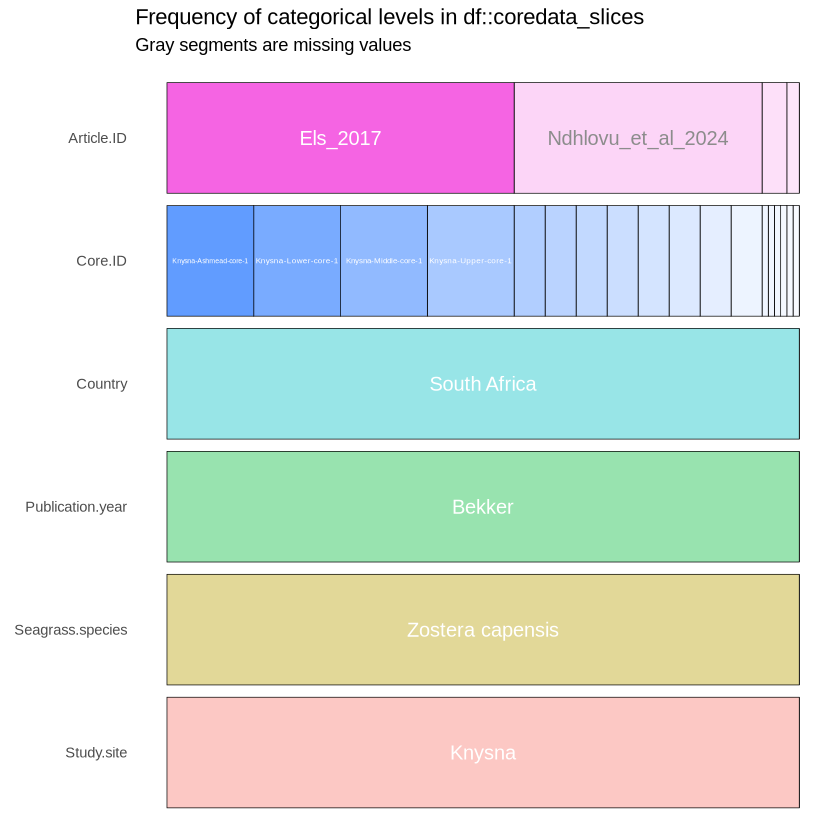

In [164]:
dim(coredata_slices)
inspectdf::inspect_cat(coredata_slices) |> inspectdf::show_plot()

In [165]:
glimpse(coredata_slices)

Rows: 102
Columns: 19
$ Article.ID               <chr> "Bekker_2015", "Bekker_2015", "Bekker_2015", …
$ Publication.year         <chr> "Bekker", "Bekker", "Bekker", "Bekker", "Bekk…
$ Study.site               <chr> "Knysna", "Knysna", "Knysna", "Knysna", "Knys…
$ Country                  <chr> "South Africa", "South Africa", "South Africa…
$ Latitude                 <dbl> -34.08270, -34.08270, -34.08270, -34.08270, -…
$ Longitude                <dbl> 23.06145, 23.06145, 23.06145, 23.06145, 23.06…
$ Seagrass.species         <chr> "Zostera capensis", "Zostera capensis", "Zost…
$ Core.ID                  <chr> "Knysna-Zostera capensis-Submerged-surface sa…
$ Top.of.section           <dbl> 0, 0, 0, 0, 0, 10, 21, 25, 35, 42, 49, 50, 56…
$ Bottom.of.section        <dbl> 5, 5, 5, 5, 10, 21, 25, 35, 42, 49, 50, 56, 6…
$ Depth.at.center.of.slice <dbl> 2.5, 2.5, 2.5, 2.5, 5.0, 15.5, 23.0, 30.0, 38…
$ Thickness.sediment.slice <dbl> 5, 5, 5, 5, 10, 11, 4, 10, 7, 7, 1, 6, 7, 7, …
$ Dry.Bulk.Density

In [166]:
xtabs(~ Study.site, data = coredata_slices)

Study.site
Knysna 
   102 

In [167]:
interpolate_slice <- function(data, x_val) {
  # Return NA if x_val is NA
  if (is.na(x_val)) return(NA_real_)

  # Rename columns to standard names (assumes only two columns: x and y)
  clean_data <- data %>%
    setNames(c("x", "y")) %>%
    filter(!is.na(x) & !is.na(y))

  if (nrow(clean_data) == 0) return(NA_real_)

  if (x_val > max(clean_data$x, na.rm = TRUE)) {
    return(NA_real_)
  }

  model <- lm(y ~ x, data = clean_data)

  predict(model, newdata = data.frame(x = x_val))
}

In [168]:
colnames(coredata_slices)

[1] "Article.ID"               "Publication.year"        
 [3] "Study.site"               "Country"                 
 [5] "Latitude"                 "Longitude"               
 [7] "Seagrass.species"         "Core.ID"                 
 [9] "Top.of.section"           "Bottom.of.section"       
[11] "Depth.at.center.of.slice" "Thickness.sediment.slice"
[13] "Dry.Bulk.Density"         "depth_interval"          
[15] "Corg"                     "Corg_DBD"                
[17] "Carbon_density"           "cumsum_Corg_DBD"         
[19] "carbon_stock_MgC_ha"

In [169]:
soc_vars <- c("Corg", "Dry.Bulk.Density")
soc_depths  <- c(15, 20, 30, 50)         

In [170]:
get_slice_val <- function(data, x_col, y_col, x_val) {
  match_row <- data[data[[x_col]] == x_val, , drop = FALSE]
  if (nrow(match_row) == 0) return(NA_real_)
  return(match_row[[y_col]][1])
}

In [171]:
get_slice_val <- function(data, x_val) {
  # Ensure input is a data.frame and has at least 2 columns
  if (!is.data.frame(data) || ncol(data) < 2) return(NA_real_)
  
  x_col <- names(data)[1]
  y_col <- names(data)[2]
  
  # If either column is missing, return NA
  if (is.null(x_col) || is.null(y_col)) return(NA_real_)
  
  # Defensive: ensure x_col has non-NA entries to check
  if (!x_col %in% names(data) || !y_col %in% names(data)) return(NA_real_)
  
  # Filter for exact match
  match_row <- data[data[[x_col]] == x_val, , drop = FALSE]
  
  # Return NA if no match
  if (nrow(match_row) == 0) return(NA_real_)
  
  return(match_row[[y_col]][1])
}


In [172]:
slice_check <- function(data, x_val, xreal) {
    
  if (isTRUE(x_val == xreal)) {
    return(NA_real_)
  } else {
    return(get_slice_val(data, x_val))
  }
}

In [173]:
grouping_cols <- c("Article.ID", "Study.site", "Country", "Latitude", "Longitude", "Seagrass.species", "Core.ID")

In [112]:
na_report_list <- list()

core_varx_depthx_list <- lapply(soc_vars, function(varx) {
  
    lapply(soc_depths, function(depthx) {

    var_name <- paste0(varx, "_", depthx)
    int_var_name <- paste0("int_", varx, "_", depthx)
    N_sample_count <-  paste0("stat_N_sample_", varx)
    n_count <-  paste0("stat_n_sample_", varx)

    df <- coredata_slices |>
          dplyr::group_by(across(all_of(grouping_cols))) |>
          dplyr::summarise(!!N_sample_count := sum(!is.na(.data[[varx]])),
                           !!n_count := n(),
                           Depth.of.core = max(Bottom.of.section),
                           !!var_name := get_slice_val(pick(depth_interval, all_of(varx)), x_val = depthx),
                           !!int_var_name := interpolate_slice(pick(depth_interval, all_of(varx)), x_val = depthx),
                           .groups = "drop") |>
          dplyr::ungroup() 

    return(df)
  })
})


In [113]:
core_varx_depthx_df <- Reduce(function(x, y) merge(x, y), core_varx_depthx_list)

In [114]:
colnames(core_varx_depthx_df)

[1] "Article.ID"                       "Study.site"                      
 [3] "Country"                          "Latitude"                        
 [5] "Longitude"                        "Seagrass.species"                
 [7] "Core.ID"                          "Depth.of.core"                   
 [9] "Article.ID.1"                     "Study.site.1"                    
[11] "Country.1"                        "Latitude.1"                      
[13] "Longitude.1"                      "Seagrass.species.1"              
[15] "Core.ID.1"                        "Depth.of.core.1"                 
[17] "Article.ID.2"                     "Study.site.2"                    
[19] "Country.2"                        "Latitude.2"                      
[21] "Longitude.2"                      "Seagrass.species.2"              
[23] "Core.ID.2"                        "Depth.of.core.2"                 
[25] "Article.ID.3"                     "Study.site.3"                    
[27] "Country.3"                        "Latitude.3"                      
[29] "Longitude.3"                      "Seagrass.species.3"              
[31] "Core.ID.3"                        "Depth.of.core.3"                 
[33] "stat_N_sample_Corg"               "stat_n_sample_Corg"              
[35] "Corg_15"                          "int_Corg_15"                     
[37] "stat_N_sample_Corg.1"             "stat_n_sample_Corg.1"            
[39] "Corg_20"                          "int_Corg_20"                     
[41] "stat_N_sample_Corg.2"             "stat_n_sample_Corg.2"            
[43] "Corg_30"                          "int_Corg_30"                     
[45] "stat_N_sample_Corg.3"             "stat_n_sample_Corg.3"            
[47] "Corg_50"                          "int_Corg_50"                     
[49] "stat_N_sample_Dry.Bulk.Density"   "stat_n_sample_Dry.Bulk.Density"  
[51] "Dry.Bulk.Density_15"              "int_Dry.Bulk.Density_15"         
[53] "stat_N_sample_Dry.Bulk.Density.1" "stat_n_sample_Dry.Bulk.Density.1"
[55] "Dry.Bulk.Density_20"              "int_Dry.Bulk.Density_20"         
[57] "stat_N_sample_Dry.Bulk.Density.2" "stat_n_sample_Dry.Bulk.Density.2"
[59] "Dry.Bulk.Density_30"              "int_Dry.Bulk.Density_30"         
[61] "stat_N_sample_Dry.Bulk.Density.3" "stat_n_sample_Dry.Bulk.Density.3"
[63] "Dry.Bulk.Density_50"              "int_Dry.Bulk.Density_50"

In [115]:
dim(core_varx_depthx_df)

[1] 137  64

In [116]:
core_varx_depthx_df <- Reduce(function(x, y)  merge(x, y), core_varx_depthx_list) |>  dplyr::select(-matches("\\.\\d+$"))

In [117]:
core_Corg_DBD_slices <- coredata_slices |>
                        dplyr::group_by(across(all_of(grouping_cols))) |>
                        dplyr::summarise(Depth.of.core = max(Bottom.of.section),
                                          near_15 = max(Bottom.of.section[Bottom.of.section <= 15], na.rm = TRUE),
                                          cs_Corg_DBD_15 = slice_check(pick(Bottom.of.section, cumsum_Corg_DBD), x_val = near_15, xreal = 15),
                                          Corg.stock_15 = slice_check(pick(Bottom.of.section, carbon_stock_MgC_ha), x_val = near_15, xreal = 15),
                                          near_20 = max(Bottom.of.section[Bottom.of.section <= 20], na.rm = TRUE),
                                          cs_Corg_DBD_20 = slice_check(pick(Bottom.of.section, cumsum_Corg_DBD), x_val = near_20, xreal = 20),
                                          Corg.stock_20 = slice_check(pick(Bottom.of.section, carbon_stock_MgC_ha), x_val = near_20, xreal = 20),
                                          near_30 = max(Bottom.of.section[Bottom.of.section <= 30], na.rm = TRUE),
                                          cs_Corg_DBD_30 = slice_check(pick(Bottom.of.section, cumsum_Corg_DBD), x_val = near_30, xreal = 30),
                                          Corg.stock_30 = slice_check(pick(Bottom.of.section, carbon_stock_MgC_ha), x_val = near_30, xreal = 30),
                                          near_50 = max(Bottom.of.section[Bottom.of.section <= 50], na.rm = TRUE),
                                          cs_Corg_DBD_50 = slice_check(pick(Bottom.of.section, cumsum_Corg_DBD), x_val = near_50, xreal = 50),
                                          Corg.stock_50 = slice_check(pick(Bottom.of.section, carbon_stock_MgC_ha), x_val = near_50, xreal = 50),
                                          totCorg.stock = slice_check(pick(Depth.of.core,  carbon_stock_MgC_ha), x_val = Depth.of.core, xreal = 50))

`summarise()` has grouped output by 'Article.ID', 'Study.site', 'Country', 'Latitude', 'Longitude', 'Seagrass.species'. You can override using the `.groups` argument.


In [118]:
dim(core_varx_depthx_df)

[1] 137  28

In [126]:
core_Corg_DBD_slices <- coredata_slices |>
                        dplyr::group_by(across(all_of(grouping_cols))) |>
                        dplyr::summarise(Depth.of.core = max(Bottom.of.section),
                                          near_15 = max(Bottom.of.section[Bottom.of.section <= 15], na.rm = TRUE),
                                          cs_Corg_DBD_15 = slice_check(pick(Bottom.of.section, cumsum_Corg_DBD), x_val = near_15, xreal = 15),
                                          Corg.stock_15 = slice_check(pick(Bottom.of.section, carbon_stock_MgC_ha), x_val = near_15, xreal = 15),
                                          near_20 = max(Bottom.of.section[Bottom.of.section <= 20], na.rm = TRUE),
                                          cs_Corg_DBD_20 = slice_check(pick(Bottom.of.section, cumsum_Corg_DBD), x_val = near_20, xreal = 20),
                                          Corg.stock_20 = slice_check(pick(Bottom.of.section, carbon_stock_MgC_ha), x_val = near_20, xreal = 20),
                                          near_30 = max(Bottom.of.section[Bottom.of.section <= 30], na.rm = TRUE),
                                          cs_Corg_DBD_30 = slice_check(pick(Bottom.of.section, cumsum_Corg_DBD), x_val = near_30, xreal = 30),
                                          Corg.stock_30 = slice_check(pick(Bottom.of.section, carbon_stock_MgC_ha), x_val = near_30, xreal = 30),
                                          near_50 = max(Bottom.of.section[Bottom.of.section <= 50], na.rm = TRUE),
                                          cs_Corg_DBD_50 = slice_check(pick(Bottom.of.section, cumsum_Corg_DBD), x_val = near_50, xreal = 50),
                                          Corg.stock_50 = slice_check(pick(Bottom.of.section, carbon_stock_MgC_ha), x_val = near_50, xreal = 50),
                                          totCorg.stock = slice_check(pick(Depth.of.core,  carbon_stock_MgC_ha), x_val = Depth.of.core, xreal = 50))

`summarise()` has grouped output by 'Article.ID', 'Study.site', 'Country', 'Latitude', 'Longitude', 'Seagrass.species'. You can override using the `.groups` argument.


In [127]:
core_varx_Corg <- merge(core_varx_depthx_df, core_Corg_DBD_slices)

In [131]:
core_varx_Corg |>
dplyr::select(where(is.character)) |> colnames() |> dput()

c("Article.ID", "Study.site", "Country", "Seagrass.species", 
"Core.ID")


In [128]:
glimpse(core_varx_Corg)

Rows: 137
Columns: 41
$ Article.ID                     <chr> "Bekker_2015", "Bekker_2015", "Bekker_2…
$ Study.site                     <chr> "Knysna", "Knysna", "Knysna", "Knysna",…
$ Country                        <chr> "South Africa", "South Africa", "South …
$ Latitude                       <dbl> -34.08270, -34.08270, -34.08270, -34.08…
$ Longitude                      <dbl> 23.06145, 23.06145, 23.06145, 23.06145,…
$ Seagrass.species               <chr> "Zostera capensis", "Zostera capensis",…
$ Core.ID                        <chr> "Knysna-Zostera capensis-Submerged-surf…
$ Depth.of.core                  <dbl> 5, 5, 5, 5, 120, 120, 120, 120, 120, 12…
$ stat_N_sample_Corg             <int> 1, 1, 1, 1, 3, 3, 2, 3, 3, 1, 3, 1, 4, …
$ stat_n_sample_Corg             <int> 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 4, …
$ Corg_15                        <dbl> NA, NA, NA, NA, 0.009248434, 0.01566045…
$ int_Corg_15                    <dbl> NA, NA, NA, NA, 0.01917982, 0.03033423,…
$ Corg_20         

In [142]:
core_varx_Corg |>
          dplyr::group_by(Article.ID, Study.site) |>
          dplyr::summarise(N_samples = dplyr::n(), 
                           na_count = sum(is.na(Corg.stock_15)),
                           total_count = n(),
                           na_proportion = 100*(na_count / total_count), .groups = "drop") |>
          dplyr::ungroup() |>
          dplyr::arrange(Article.ID, Study.site)

Article.ID,Study.site,N_samples,na_count,total_count,na_proportion
<chr>,<chr>,<int>,<int>,<int>,<dbl>
Bekker_2015,Knysna,4,4,4,100
Bezuidenhout_et_al_2011,Kromme,8,8,8,100
Bossert_et_al_2024,Berg,30,30,30,100
Bossert_et_al_2024,Breede,15,15,15,100
Brown_and_Rajkaran_2020,Kobonqaba,1,1,1,100
Els_2017,Knysna,4,4,4,100
Els_2019,Swartkops,12,12,12,100
Lemley_2018,Kariega,5,5,5,100
Ndhlovu_et_al_2024,Berg,8,0,8,0
